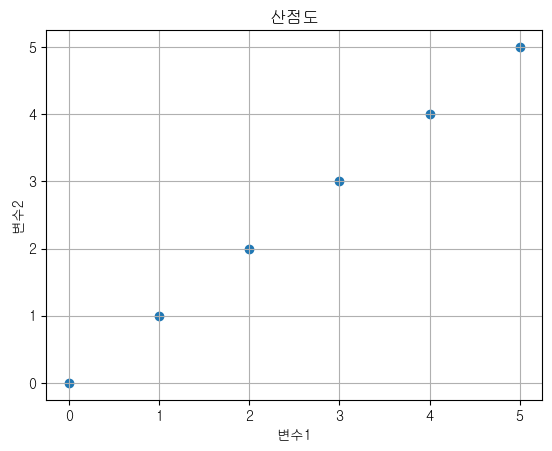

In [1]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

In [2]:
# 모든 열 출력
pd.set_option('display.max_columns', None)

In [3]:
# csv파일 불러오기

df = pd.read_csv('빅콘테스트_전처리_완료.csv', encoding = 'utf8')

In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from math import sqrt
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
X = df.drop('price', axis=1)
y = df['price']

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, shuffle = False)

### xgboost 모델 회귀 예측

In [6]:
# XGBRegressor 모델 생성 및 학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Predict, mean_absolute_error, rmse 결과 출력
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

7269.843355490727
11034.801459048856
R-squared: 0.9648352072586621


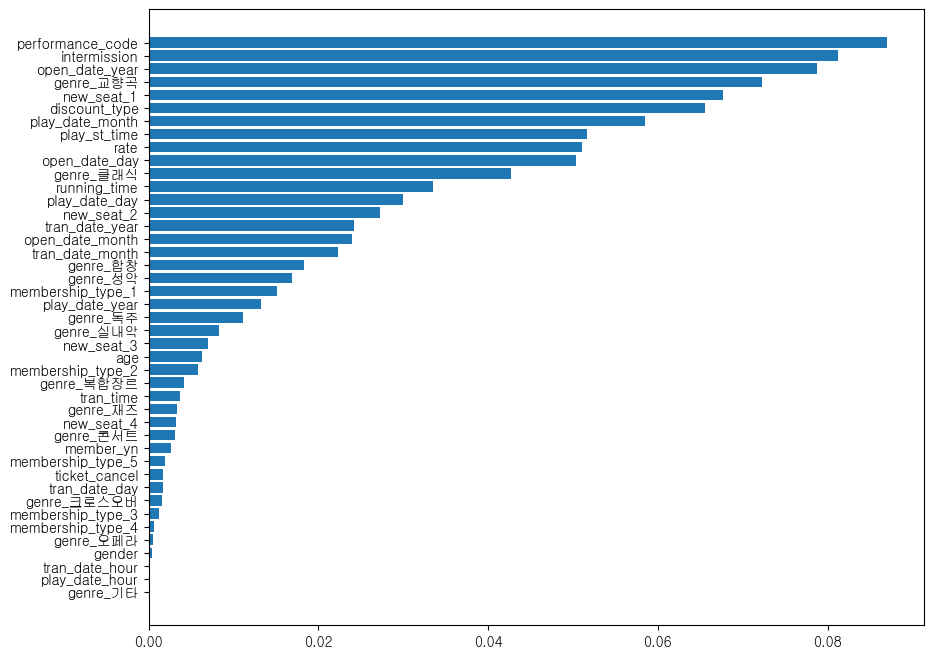

In [7]:
# Feature importance, feature 선언
importances = model_xgb.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [8]:
# LGBMRegressor 모델 생성/학습
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train, y_train)

# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_LGBM.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 439775, number of used features: 43
[LightGBM] [Info] Start training from score 57968.077489
9617.420176135165
13881.556517065312
R-squared: 0.9443512586508664


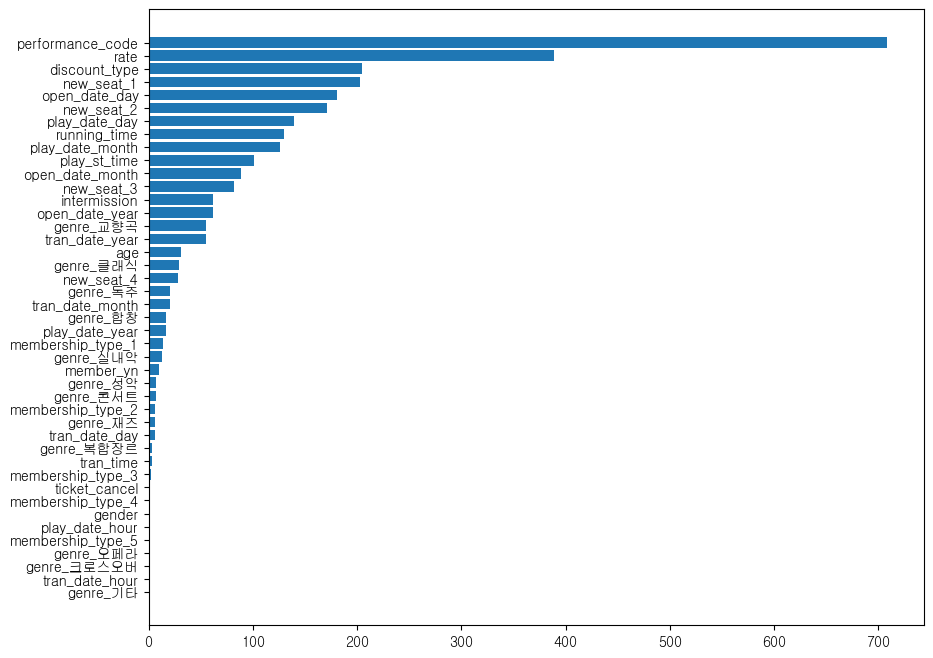

In [9]:
# Feature importance, feature 선언
importances = model_LGBM.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [10]:
# RandomForestRegressor 모델 생성/학습
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Predict를 수행하고 mean_absolute_error와 rmse 결과 출력하기
pred = model_RF.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

849.5297549048868
3162.9415049203826
R-squared: 0.9971109082428862


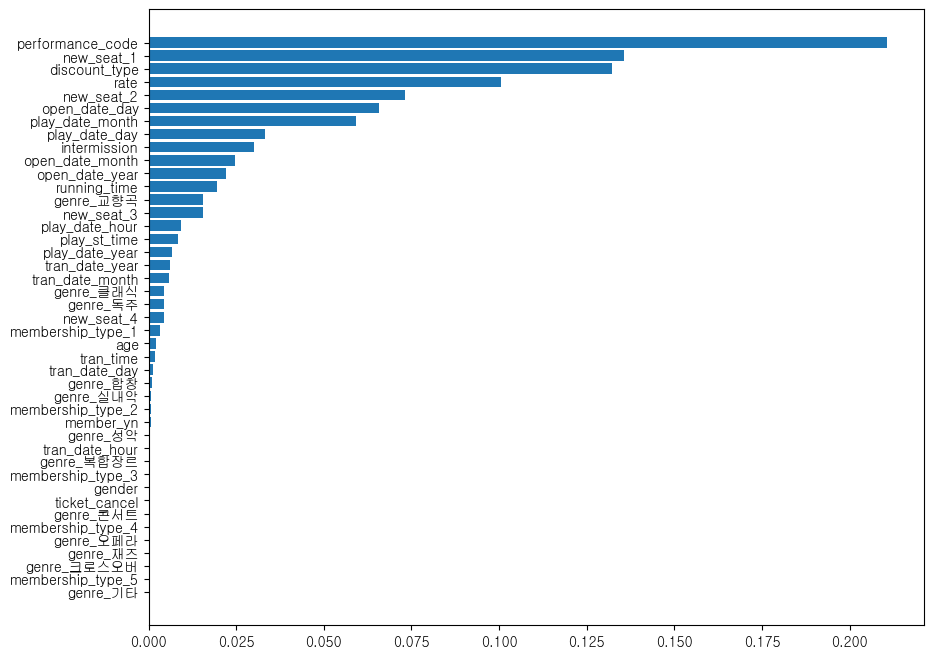

In [11]:
# Feature importance, feature 선언
importances = model_RF.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

### 랜덤포레스트의 모델 학습 결과 분석

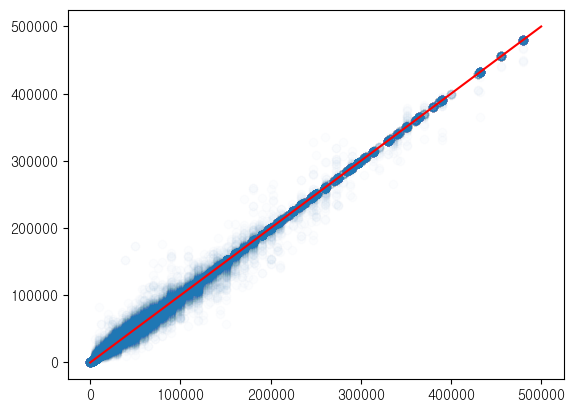

In [14]:
plt.scatter(x = y_test, y = pred, alpha = 0.01)
plt.plot([0, 500000], [0, 500000], 'r-')

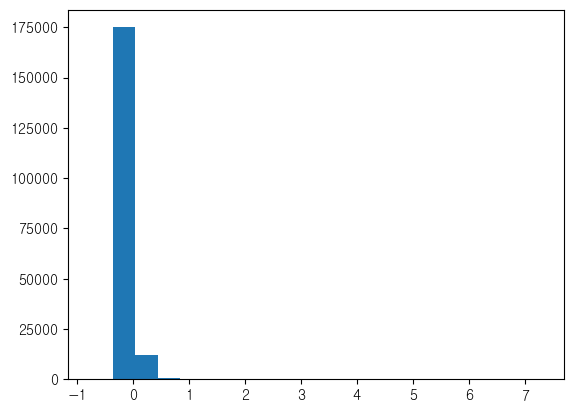

In [16]:
err = (pred - y_test) / y_test

plt.hist(err, bins = 20)
plt.show()

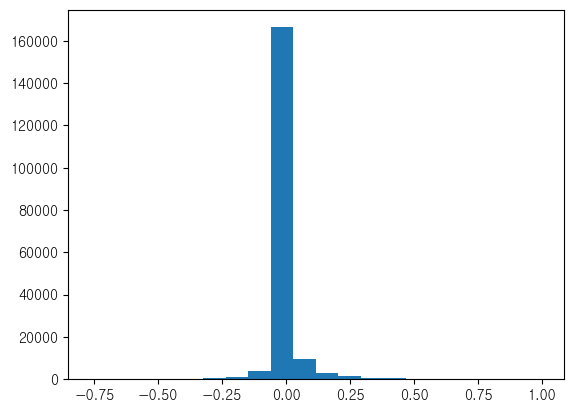

In [18]:
err = (pred - y_test) / y_test

plt.hist(err[err < 1], bins = 20)
plt.show()